# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [43]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

csv = "/output_data/cities.csv"

### Generate the Cities List by Using the `citipy` Library

In [44]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [45]:
# Set the API base URL
url = f'http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric'


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
    # Create endpoint URL with each city
    city_url = f'{url}&q={city}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']    
    
        # Append the City information into city_data list
        city_data.append({"City": city, 
                        "Lat": city_lat, 
                        "Lng": city_lng, 
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
    pass
        
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | macau
Processing Record 3 of Set 1 | malpica
Processing Record 4 of Set 1 | bilibino
Processing Record 5 of Set 1 | avarua
Processing Record 6 of Set 1 | iqaluit
Processing Record 7 of Set 1 | tapes
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | blackmans bay
Processing Record 11 of Set 1 | sao joao da barra
Processing Record 12 of Set 1 | yaren
Processing Record 13 of Set 1 | moyynkum
Processing Record 14 of Set 1 | magadan
Processing Record 15 of Set 1 | invercargill
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | kafue
Processing Record 19 of Set 1 | fort bragg
Processing Record 20 of Set 1 | klyuchi
Processing Record 21 of Set 1 | village of oak creek (big park)
Processing Record 22 of Set 1 | haiku-pauwela
Processing Re

In [46]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [47]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,23.94,83,100,0.45,US,1723250756
1,macau,22.2006,113.5461,32.06,89,20,4.12,MO,1723250757
2,malpica,43.3228,-8.8105,18.88,65,38,5.25,ES,1723250757
3,bilibino,68.0546,166.4372,16.39,38,100,5.36,RU,1723250757
4,avarua,-21.2078,-159.7750,23.03,56,20,3.09,CK,1723250543


In [48]:
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,23.94,83,100,0.45,US,1723250756
1,macau,22.2006,113.5461,32.06,89,20,4.12,MO,1723250757
2,malpica,43.3228,-8.8105,18.88,65,38,5.25,ES,1723250757
3,bilibino,68.0546,166.4372,16.39,38,100,5.36,RU,1723250757
4,avarua,-21.2078,-159.7750,23.03,56,20,3.09,CK,1723250543
...,...,...,...,...,...,...,...,...,...
565,ndele,8.4109,20.6473,21.55,95,99,0.60,CF,1723250899
566,howard springs,-12.4970,131.0470,27.95,73,5,3.72,AU,1723250899
567,maputo,-25.9653,32.5892,18.82,59,0,4.63,MZ,1723250900
568,kayangel,8.0823,134.7173,28.43,74,76,2.66,PW,1723250900


In [49]:
# Export the City_Data into a csv
city_data_df.to_csv(csv, index_label="City_ID")

In [50]:
# Read saved data
city_data_df = pd.read_csv(csv, index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,23.94,83,100,0.45,US,1723250756
1,macau,22.2006,113.5461,32.06,89,20,4.12,MO,1723250757
2,malpica,43.3228,-8.8105,18.88,65,38,5.25,ES,1723250757
3,bilibino,68.0546,166.4372,16.39,38,100,5.36,RU,1723250757
4,avarua,-21.2078,-159.7750,23.03,56,20,3.09,CK,1723250543


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

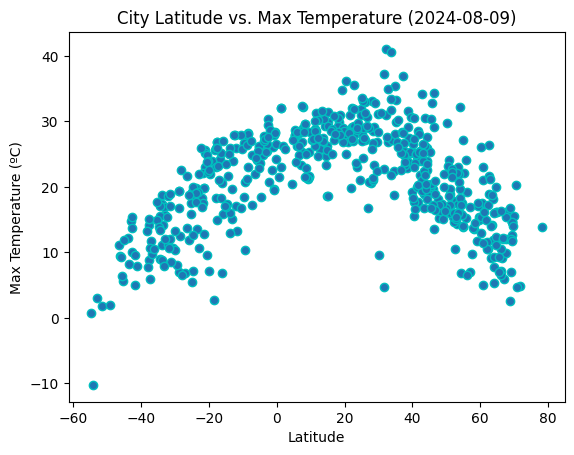

In [51]:
import datetime

# Build scatter plot for latitude vs. temperature
x = city_data_df['Lat']
y = city_data_df['Max Temp']
today = datetime.date.today()

# Incorporate the other graph properties
plt.scatter(x, y, edgecolors='c')
plt.title(f"City Latitude vs. Max Temperature ({today})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (ºC)')

# Save the figure
plt.savefig("/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

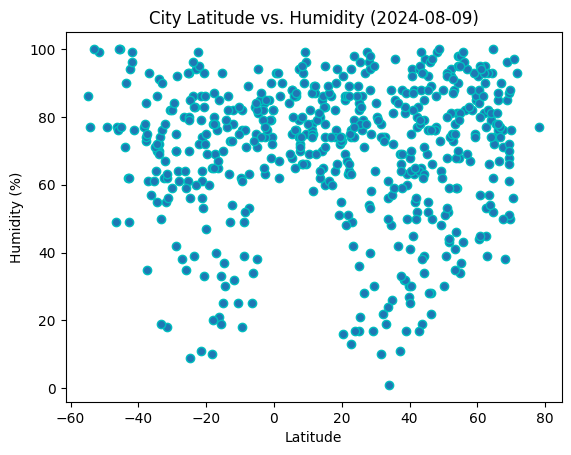

In [52]:
# Build the scatter plots for latitude vs. humidity
x = city_data_df['Lat']
y = city_data_df['Humidity']

# Incorporate the other graph properties
plt.scatter(x, y, edgecolors='c')
plt.title(f"City Latitude vs. Humidity ({today})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

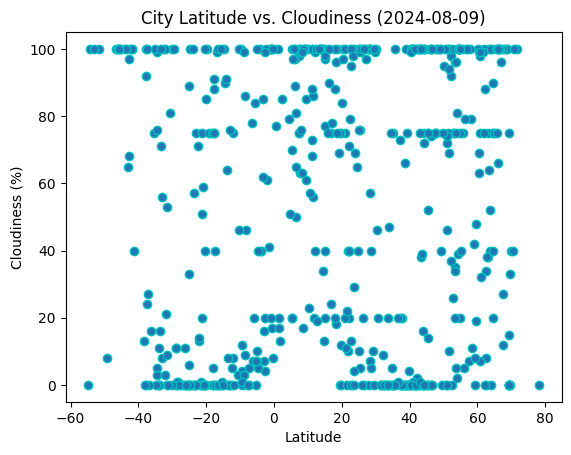

In [53]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df['Lat']
y = city_data_df['Cloudiness']

# Incorporate the other graph properties
plt.scatter(x, y, edgecolors='c')
plt.title(f"City Latitude vs. Cloudiness ({today})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

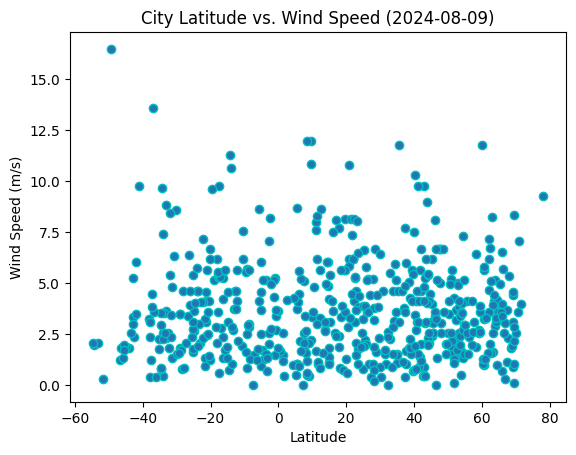

In [54]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df['Lat']
y = city_data_df['Wind Speed']


# Incorporate the other graph properties
plt.scatter(x, y, edgecolors='c')
plt.title(f"City Latitude vs. Wind Speed ({today})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [55]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,23.94,83,100,0.45,US,1723250756
1,macau,22.2006,113.5461,32.06,89,20,4.12,MO,1723250757
2,malpica,43.3228,-8.8105,18.88,65,38,5.25,ES,1723250757
3,bilibino,68.0546,166.4372,16.39,38,100,5.36,RU,1723250757
5,iqaluit,63.7506,-68.5145,11.85,81,40,4.12,CA,1723250758


In [56]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']<0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,avarua,-21.2078,-159.7750,23.03,56,20,3.09,CK,1723250543
6,tapes,-30.6733,-51.3958,10.66,82,81,6.33,BR,1723250758
7,grytviken,-54.2811,-36.5092,-10.24,77,100,1.97,GS,1723250758
8,waitangi,-43.9535,-176.5597,12.12,71,100,1.79,NZ,1723250758
9,blackmans bay,-43.0167,147.3167,14.74,62,65,3.34,AU,1723250759


###  Temperature vs. Latitude Linear Regression Plot

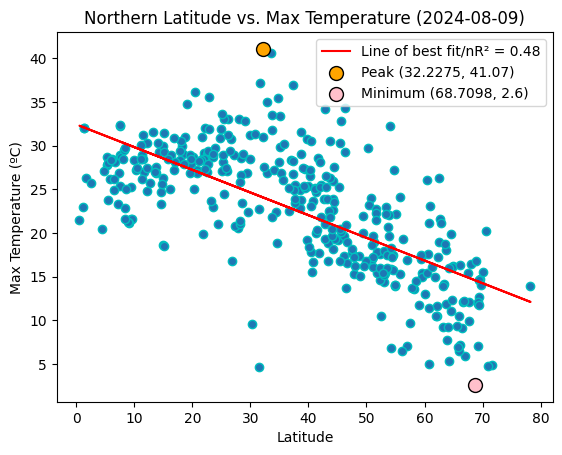

In [68]:
# Linear regression on Northern Hemisphere
# Build scatter plot for latitude vs. temperature
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
today = datetime.date.today()

# Incorporate the other graph properties
plt.scatter(x, y, edgecolors='c')
plt.title(f"Northern Latitude vs. Max Temperature ({today})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (ºC)')

# calculate the regression line
slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
regress_values = slope * x + intercept
plt.plot(x, regress_values, color = 'r', label=f'Line of best fit/nR² = {rvalue**2:.2f}')

# Find the peak value
max_temp = y.max()
max_temp_lat = x[y.idxmax()]

# Highlight the peak point
plt.scatter(max_temp_lat, max_temp, color='orange', edgecolors='black', s=100, label=f'Peak ({max_temp_lat}, {max_temp})')

# Find the min value
min_temp = y.min()
min_temp_lat = x[y.idxmin()]

# Highlight the min point
plt.scatter(min_temp_lat, min_temp, color='pink', edgecolors='black', s=100, label=f'Minimum ({min_temp_lat}, {min_temp})')

# Show legend
plt.legend() 

# Show plot
plt.show()

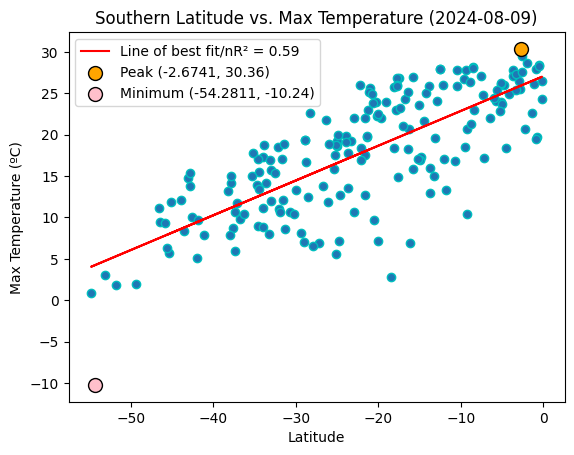

In [69]:
# Linear regression on Southern Hemisphere

# Build scatter plot for latitude vs. temperature
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
today = datetime.date.today()

# Incorporate the other graph properties
plt.scatter(x, y, edgecolors='c')
plt.title(f"Southern Latitude vs. Max Temperature ({today})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (ºC)')

# calculate the regression line
slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
regress_values = slope * x + intercept
plt.plot(x, regress_values, color = 'r', label=f'Line of best fit/nR² = {rvalue**2:.2f}')

# Find the peak value
max_temp = y.max()
max_temp_lat = x[y.idxmax()]

# Highlight the peak point
plt.scatter(max_temp_lat, max_temp, color='orange', edgecolors='black', s=100, label=f'Peak ({max_temp_lat}, {max_temp})')

# Find the min value
min_temp = y.min()
min_temp_lat = x[y.idxmin()]

# Highlight the min point
plt.scatter(min_temp_lat, min_temp, color='pink', edgecolors='black', s=100, label=f'Minimum ({min_temp_lat}, {min_temp})')

# Show legend
plt.legend() 

# Show plot
plt.show()

**Discussion about the linear relationship:** As latitude approaches 0º (the Equator), temperatures rise to a peak of 41.07ºC. Moving away from the Equator, temperatures steadily decrease, reaching a low of -10.24ºC. The coldest temperatures are found near the poles, while the Equator experiences the highest temperatures.

### Humidity vs. Latitude Linear Regression Plot

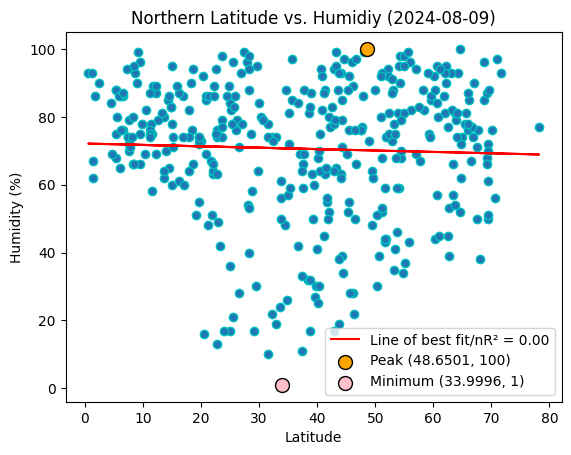

In [70]:
# Northern Hemisphere

# Build scatter plot for latitude vs. humidity
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
today = datetime.date.today()

# Incorporate the other graph properties
plt.scatter(x, y, edgecolors='c')
plt.title(f"Northern Latitude vs. Humidiy ({today})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# calculate the regression line
slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
regress_values = slope * x + intercept
plt.plot(x, regress_values, color = 'r', label=f'Line of best fit/nR² = {rvalue**2:.2f}')

# Find the peak value
max_temp = y.max()
max_temp_lat = x[y.idxmax()]

# Highlight the peak point
plt.scatter(max_temp_lat, max_temp, color='orange', edgecolors='black', s=100, label=f'Peak ({max_temp_lat}, {max_temp})')

# Find the min value
min_temp = y.min()
min_temp_lat = x[y.idxmin()]

# Highlight the min point
plt.scatter(min_temp_lat, min_temp, color='pink', edgecolors='black', s=100, label=f'Minimum ({min_temp_lat}, {min_temp})')

# Show legend
plt.legend() 

# Show plot
plt.show()

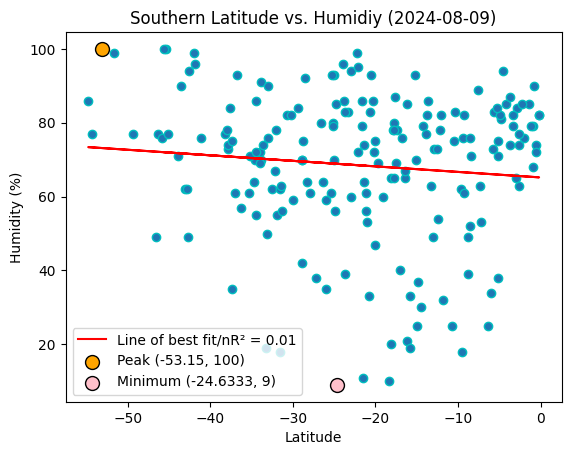

In [71]:
# Southern Hemisphere

# Build scatter plot for latitude vs. humidity
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
today = datetime.date.today()

# Incorporate the other graph properties
plt.scatter(x, y, edgecolors='c')
plt.title(f"Southern Latitude vs. Humidiy ({today})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# calculate the regression line
slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
regress_values = slope * x + intercept
plt.plot(x, regress_values, color = 'r', label=f'Line of best fit/nR² = {rvalue**2:.2f}')

# Find the peak value
max_temp = y.max()
max_temp_lat = x[y.idxmax()]

# Highlight the peak point
plt.scatter(max_temp_lat, max_temp, color='orange', edgecolors='black', s=100, label=f'Peak ({max_temp_lat}, {max_temp})')

# Find the min value
min_temp = y.min()
min_temp_lat = x[y.idxmin()]

# Highlight the min point
plt.scatter(min_temp_lat, min_temp, color='pink', edgecolors='black', s=100, label=f'Minimum ({min_temp_lat}, {min_temp})')

# Show legend
plt.legend() 

# Show plot
plt.show()

**Discussion about the linear relationship:** There is a weak correlation between humidity and latitude, as indicated by an R-value close to 0. This suggests that the linear regression line does not fit the data well, and no consistent trend is apparent. While there may be a slight indication of lower humidity levels near the Equator, further analysis is needed to confirm any significant patterns. 

### Cloudiness vs. Latitude Linear Regression Plot

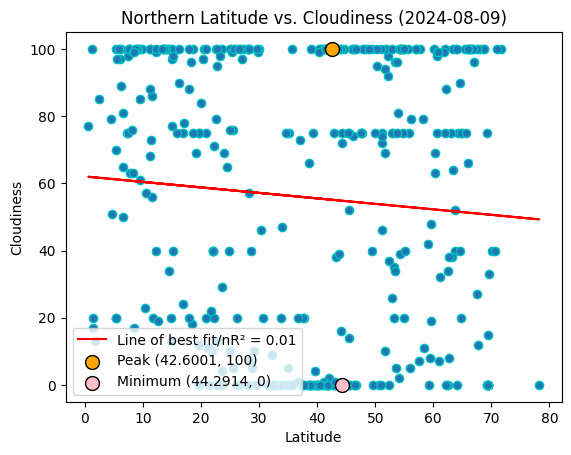

In [74]:
# Northern Hemisphere
# Build scatter plot for latitude vs. Cloudiness
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
today = datetime.date.today()

# Incorporate the other graph properties
plt.scatter(x, y, edgecolors='c')
plt.title(f"Northern Latitude vs. Cloudiness ({today})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# calculate the regression line
slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
regress_values = slope * x + intercept
plt.plot(x, regress_values, color = 'r', label=f'Line of best fit/nR² = {rvalue**2:.2f}')

# Find the peak value
max_temp = y.max()
max_temp_lat = x[y.idxmax()]

# Highlight the peak point
plt.scatter(max_temp_lat, max_temp, color='orange', edgecolors='black', s=100, label=f'Peak ({max_temp_lat}, {max_temp})')

# Find the min value
min_temp = y.min()
min_temp_lat = x[y.idxmin()]

# Highlight the min point
plt.scatter(min_temp_lat, min_temp, color='pink', edgecolors='black', s=100, label=f'Minimum ({min_temp_lat}, {min_temp})')

# Show legend
plt.legend() 

# Show plot
plt.show()

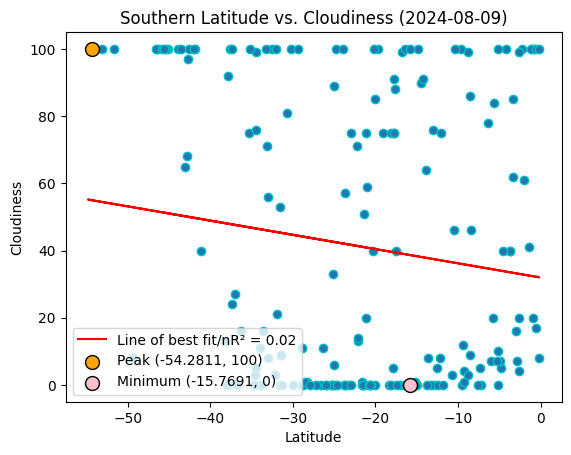

In [75]:
# Southern Hemisphere

# Build scatter plot for latitude vs. Cloudiness
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
today = datetime.date.today()

# Incorporate the other graph properties
plt.scatter(x, y, edgecolors='c')
plt.title(f"Southern Latitude vs. Cloudiness ({today})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# calculate the regression line
slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
regress_values = slope * x + intercept
plt.plot(x, regress_values, color = 'r', label=f'Line of best fit/nR² = {rvalue**2:.2f}')

# Find the peak value
max_temp = y.max()
max_temp_lat = x[y.idxmax()]

# Highlight the peak point
plt.scatter(max_temp_lat, max_temp, color='orange', edgecolors='black', s=100, label=f'Peak ({max_temp_lat}, {max_temp})')

# Find the min value
min_temp = y.min()
min_temp_lat = x[y.idxmin()]

# Highlight the min point
plt.scatter(min_temp_lat, min_temp, color='pink', edgecolors='black', s=100, label=f'Minimum ({min_temp_lat}, {min_temp})')

# Show legend
plt.legend() 

# Show plot
plt.show()

**Discussion about the linear relationship:** The line of best fit is not an ideal method for evaluating this data set, as the R-value is close to 0, indicating a poor fit. However, a noticeable pattern emerges, with 'cloudiness' often clustering near 0% or 100%, leaving a gap in the middle of the graph. A more effective approach might be to calculate the average cloudiness at each latitude over several years to better understand the correlation. Additionally, breaking the data down by seasons and comparing the Northern and Southern Hemispheres could provide further insights into how cloudiness varies with latitude.

### Wind Speed vs. Latitude Linear Regression Plot

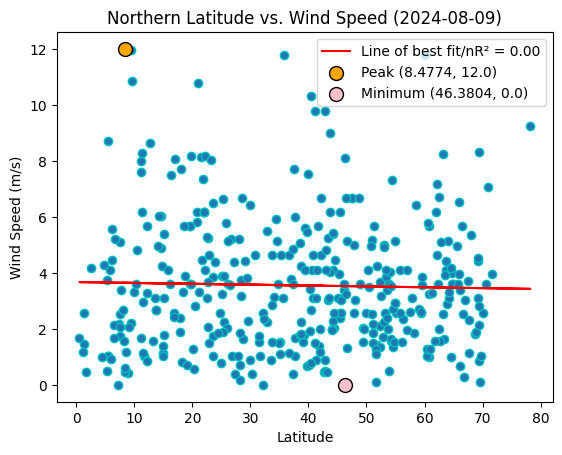

In [76]:
# Northern Hemisphere

# Build scatter plot for latitude vs. Wind Speed
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
today = datetime.date.today()

# Incorporate the other graph properties
plt.scatter(x, y, edgecolors='c')
plt.title(f"Northern Latitude vs. Wind Speed ({today})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# calculate the regression line
slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
regress_values = slope * x + intercept
plt.plot(x, regress_values, color = 'r', label=f'Line of best fit/nR² = {rvalue**2:.2f}')

# Find the peak value
max_temp = y.max()
max_temp_lat = x[y.idxmax()]

# Highlight the peak point
plt.scatter(max_temp_lat, max_temp, color='orange', edgecolors='black', s=100, label=f'Peak ({max_temp_lat}, {max_temp})')

# Find the min value
min_temp = y.min()
min_temp_lat = x[y.idxmin()]

# Highlight the min point
plt.scatter(min_temp_lat, min_temp, color='pink', edgecolors='black', s=100, label=f'Minimum ({min_temp_lat}, {min_temp})')

# Show legend
plt.legend() 

# Show plot
plt.show()

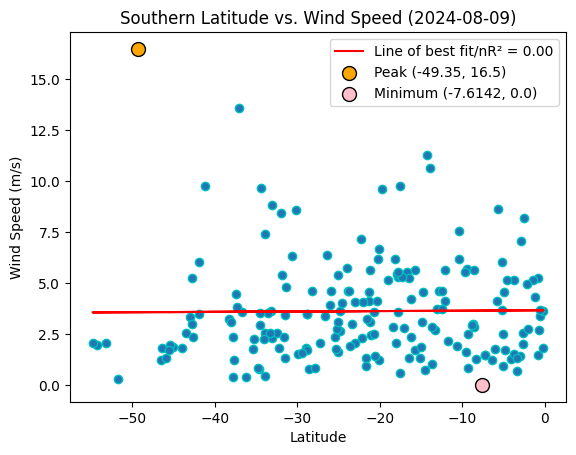

In [77]:
# Southern Hemisphere

# Build scatter plot for latitude vs. Wind Speed
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
today = datetime.date.today()

# Incorporate the other graph properties
plt.scatter(x, y, edgecolors='c')
plt.title(f"Southern Latitude vs. Wind Speed ({today})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# calculate the regression line
slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
regress_values = slope * x + intercept
plt.plot(x, regress_values, color = 'r', label=f'Line of best fit/nR² = {rvalue**2:.2f}')

# Find the peak value
max_temp = y.max()
max_temp_lat = x[y.idxmax()]

# Highlight the peak point
plt.scatter(max_temp_lat, max_temp, color='orange', edgecolors='black', s=100, label=f'Peak ({max_temp_lat}, {max_temp})')

# Find the min value
min_temp = y.min()
min_temp_lat = x[y.idxmin()]

# Highlight the min point
plt.scatter(min_temp_lat, min_temp, color='pink', edgecolors='black', s=100, label=f'Minimum ({min_temp_lat}, {min_temp})')

# Show legend
plt.legend() 

# Show plot
plt.show()

**Discussion about the linear relationship:** While the line of best fit doesn't clearly define the trend, it's evident that the average wind speed hovers around 6 m/s. By removing extreme outliers and calculating the average, we could gain valuable insights into global wind patterns. It's important to note that the highest wind speeds in both the Northern and Southern Hemispheres are found farthest from the Equator, while the lowest wind speeds occur much closer to the Equator.